In [1]:
import sys
import os

# Add the path to the code directory to the system path
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath("."), '../code')))

from run import run_instance, print_results
from QAOA import circuit_plot
from parameters import *

In [2]:
# Example Single Usage
# Change the number of ships or time slots a view the corresponding timeslot
number_ships =  8
number_time_slots = 6
NUM_READS = 10 # Number of of iterations of the simulated annealer

results = run_instance(number_ships, number_time_slots, NUM_READS)
print_results(number_ships, number_time_slots, results)

Instance with 8 ships (and 6 time slots):
  Optimized total water cost = 240.0
  Baseline total water cost   = 312
  Number of feasible solutions: 8
  Number of infeasible solutions: 2
  Tandem lockages used: 1
  Cross fills applied: 3
  Length of ships: [309.35 311.73 292.26 186.4  170.25 248.36 225.27]
  Benefit of ships: [6.5 6.5 6.5 5.7 5.  6.1 4. ]
  Infeasibility reasons: [['Ship 2 assigned 2 times (allowed at most 1 assignment).'], ['Ship 2 assigned 2 times (allowed at most 1 assignment).']]
  Timetable for best solution:

Timetable by Time Slot:
  Time slot 1 (Lock type: Panamax_A): Ships [6]
  Time slot 2 (Lock type: Panamax_B): Ships [3]
  Time slot 3 (Lock type: Panamax_A): Ships [7]
  Time slot 4 (Lock type: Panamax_B): Ships []
  Time slot 5 (Lock type: NeoPanamax): Ships [4, 5]
  Time slot 6 (Lock type: NeoPanamax): Ships [2]

--------------------------------------------------



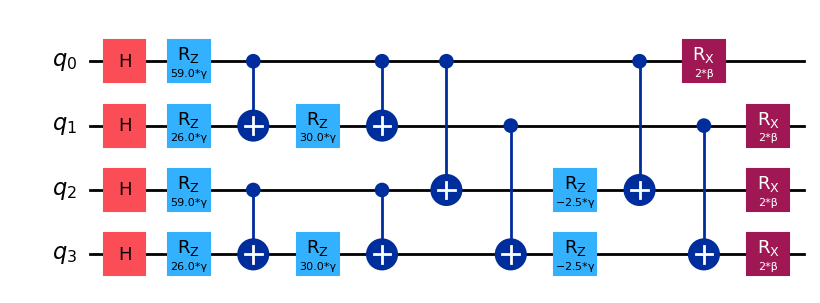

In [3]:
## Now we generate the QAOA circuit for given amount of ships and time slots
number_ships=  2
number_time_slots = 2
circuit_plot(number_ships, number_time_slots)

In [4]:
from make_qubo import build_qubo

build_qubo([200, 250], [7,7], ['Panamax_A', 'Panamax_B', 'NeoPanamax', 'NeoPanamax'])

{(0, 0): -1315.0,
 (1, 1): -1315.0,
 (2, 2): -1282.0,
 (3, 3): -1282.0,
 (4, 4): -1640.0,
 (5, 5): -1640.0,
 (6, 6): -1607.0,
 (7, 7): -1607.0,
 (0, 1): 58.5,
 (0, 2): 60,
 (0, 3): 60,
 (1, 2): 60,
 (1, 3): 60,
 (2, 3): 60,
 (4, 5): 58.5,
 (4, 6): 60,
 (4, 7): 60,
 (5, 6): 60,
 (5, 7): 60,
 (6, 7): 60,
 (0, 4): -5,
 (1, 5): -5,
 (2, 6): -5,
 (3, 7): -5,
 (0, 5): -1.5,
 (1, 4): -1.5}